This code is part of the lab forum at AAAI-25 on "Developing explainable multimodal AI models with hands-on lab on the life-cycle of rare event prediction in manufacturing"

In this code, we will see how to load a manufacturing-specifc dataset and do exploratory analysis.

#The datasets used in this lab can be downloaded from

1. Pulp and paper manufacturing dataset: https://drive.google.com/file/d/1BQuWml4T18DoTf39eNeYyiX5yrYTtY7p/view?usp=drive_link
2. Future factories multimodal dataset: https://drive.google.com/drive/folders/1l7_Blmk_RrsLHqcW_4F7-ELtll_ZGyDv
3. Future factories image dataset: https://drive.google.com/drive/folders/1VdIsSouurlVAFRLaZnPuemsDXLyKRN-2?usp=drive_link

#Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load a Time Series Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Preprocessed_FF_Data/Multi-modal Dataset/FF_Multimodal.csv")

# converting the time column (which is in MM:SS.s format) into a 12-hour AM/PM format (hh:mm:ss AM/PM)
df['time'] = df['time'].apply(lambda t: pd.to_datetime(f"00:{t}", format='%H:%M:%S.%f').strftime('%I:%M:%S %p'))

df.head(n=5)

<ipython-input-39-43586ea77a2a>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Preprocessed_FF_Data/Multi-modal Dataset/FF_Multimodal.csv")


,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,...,I_SafetyDoor1_Status,I_SafetyDoor2_Status,Q_Cell_CycleCount,I_MHS_GreenRocketTray,Cam1,Cam2,Description,CycleState,Cycle_Count_New,actual_state
0,12:50:52 AM,73.130005,72.13002,73.13002,73.363525,111,83,111,111,5269,...,True,True,1,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,NoNose,2,1,Normal
1,12:50:52 AM,73.130005,72.13002,73.13002,73.363525,111,83,111,111,5277,...,True,True,1,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,NoNose,2,1,Normal
2,12:50:52 AM,73.130005,72.13002,73.13002,73.363525,111,83,111,111,4914,...,True,True,1,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,NoNose,2,1,Normal
3,12:50:53 AM,73.130005,72.13002,73.13002,73.352539,111,83,111,111,5235,...,True,True,1,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,NoNose,2,1,Normal
4,12:50:53 AM,73.130005,72.13002,73.13002,73.352539,111,83,111,111,5311,...,True,True,1,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,NoNose,2,1,Normal


In [ ]:
#Anomaly types and occurrences of each state in the dataFrame
df.actual_state.value_counts()

,count
actual_state,
Normal,90775
"NoNose,NoBody2,NoBody1",26628
"NoNose,NoBody2",25206
NoNose,19307
NoBody1,1849
"NoBody2,NoBody1",1089
NoBody2,1078
E_STOPPED,69


In [ ]:
#Mapping categorical states to numerical values
df['actual_state'] = df['actual_state'].replace({'Normal': 0, 'NoNose,NoBody2,NoBody1': 1,'NoNose': 2,'NoNose,NoBody2': 3,'NoBody1': 4,'NoBody2,NoBody1': 5,'NoBody2': 6, 'E_STOPPED': 7})
df

<ipython-input-41-431d66c8a4ac>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['actual_state'] = df['actual_state'].replace({'Normal': 0, 'NoNose,NoBody2,NoBody1': 1,'NoNose': 2,'NoNose,NoBody2': 3,'NoBody1': 4,'NoBody2,NoBody1': 5,'NoBody2': 6, 'E_STOPPED': 7})


,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,...,I_SafetyDoor1_Status,I_SafetyDoor2_Status,Q_Cell_CycleCount,I_MHS_GreenRocketTray,Cam1,Cam2,Description,CycleState,Cycle_Count_New,actual_state
0,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5269,...,True,True,1,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,NoNose,2,1,0
1,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5277,...,True,True,1,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,NoNose,2,1,0
2,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,4914,...,True,True,1,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,NoNose,2,1,0
3,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5235,...,True,True,1,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,NoNose,2,1,0
4,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5311,...,True,True,1,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,NoNose,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165996,12:25:40 AM,88.130219,86.130241,87.630241,87.986328,111,111,111,111,11198,...,True,True,255,True,Dataset/BATCH166000/165996_0.png,Dataset/BATCH166000/165996_1.png,NoNose,8,285,2
165997,12:25:40 AM,88.130219,86.130241,87.630241,87.975342,111,111,111,111,11189,...,True,True,255,True,Dataset/BATCH166000/165997_0.png,Dataset/BATCH166000/165997_1.png,NoNose,8,285,2
165998,12:25:41 AM,88.130219,86.130241,87.630241,87.964355,111,111,111,111,11249,...,True,True,255,True,Dataset/BATCH166000/165998_0.png,Dataset/BATCH166000/165998_1.png,NoNose,8,285,2
165999,12:25:41 AM,88.130219,86.130241,87.630241,87.953369,111,111,111,111,11215,...,True,True,255,True,Dataset/BATCH166000/165999_0.png,Dataset/BATCH166000/165999_1.png,NoNose,8,285,2


In [ ]:
df.actual_state.value_counts()

,count
actual_state,
0,90775
1,26628
3,25206
2,19307
4,1849
5,1089
6,1078
7,69


# Time Series Data Augmentation

# **Basic Time Series Data Augmentation**



We use ***tsaug***, An Open-Source Python Package for Time Series Augmentation. ***tsaug*** offers a set of augmentation methods for time series, as well as a simple API to connect multiple augmenters into a pipeline.

In [ ]:
#Installation
#Prerequisites: Python 3.5 or later.
#It is recommended to install the most recent stable release of tsaug from PyPI.
#Link: https://github.com/arundo/tsaug

!pip install tsaug

Alternatively, you could install from source code. This will give you the latest, but unstable, version of tsaug.



In [ ]:
!git clone https://github.com/arundo/tsaug.git
cd tsaug/
!git checkout develop
!pip install ./

There are 15 augmentation methods implemented in tsaug. They include methods that mimic common image augmentation methods, e.g. cropping, magnifying, flipping (reversing timeline), adding noises, as well as methods that are designed specifically for time series data, e.g. time warping, sidetracking, superposing trends, etc.

# Basic Augmentation Techniques


![Basic Augmentation](https://drive.google.com/uc?export=view&id=1ggXo8dej0dySCcY6KmgqJiHkelsNuink)



![Basic Augmentation](https://drive.google.com/uc?export=view&id=1qc-a7o3fij5idbdFVlKbSNhu2dNgKNLI)


In [ ]:
from tsaug.visualization import plot

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

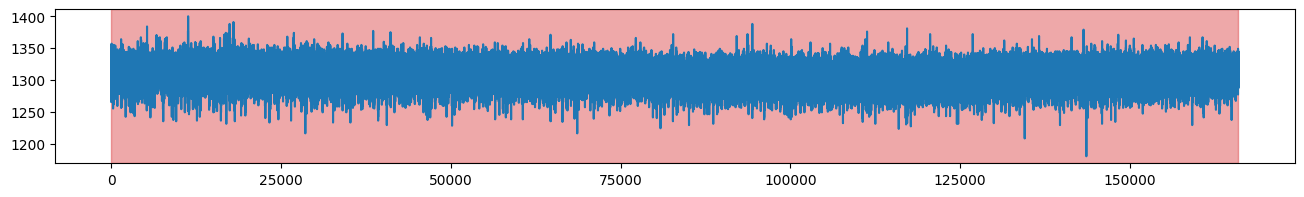

In [ ]:
plot(df.I_R02_Gripper_Load.to_numpy(), df.I_R02_Gripper_Pot.to_numpy())
#find the meaning of this plot

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

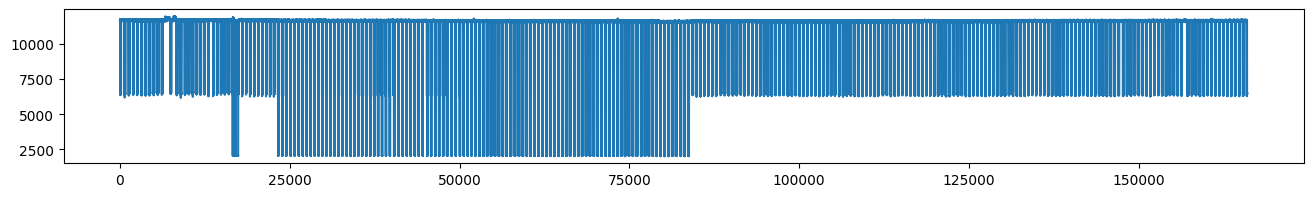

In [ ]:
plot(df.I_R02_Gripper_Pot.to_numpy())

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

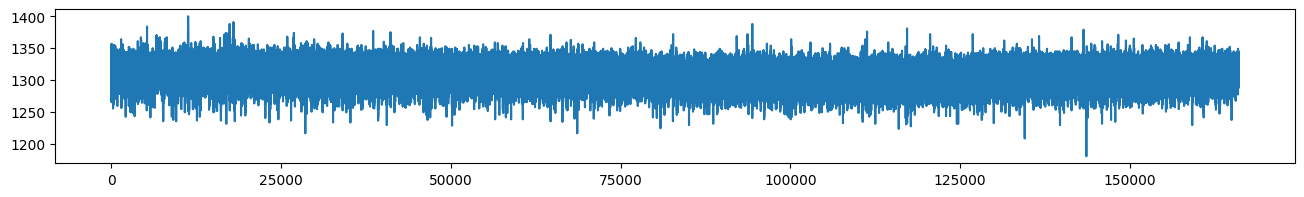

In [ ]:
plot(df.I_R02_Gripper_Load.to_numpy())

In [ ]:
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse
my_augmenter = (TimeWarp() * 2  # random time warping 2 times in parallel
+ Quantize(n_levels=[10, 20, 30])
+ Drift(max_drift=(0.1, 0.5)) @ 0.8
+ Reverse() @ 0.5
)

In [ ]:
X_aug, Y_aug = my_augmenter.augment(df.I_R02_Gripper_Load.to_numpy(), df.actual_state.to_numpy())

(<Figure size 1600x400 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

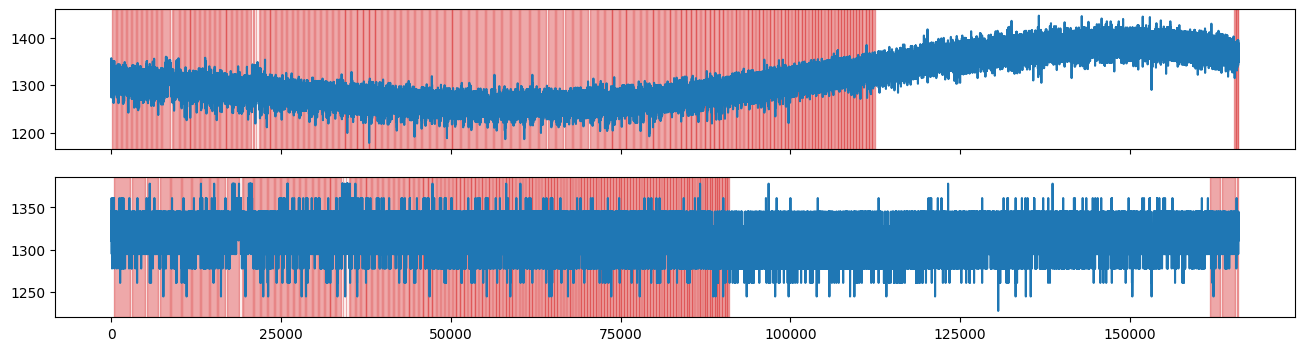

In [ ]:
plot(X_aug, Y_aug)

In [ ]:
X_aug= my_augmenter.augment(df.I_R02_Gripper_Load.to_numpy())

(<Figure size 1600x400 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

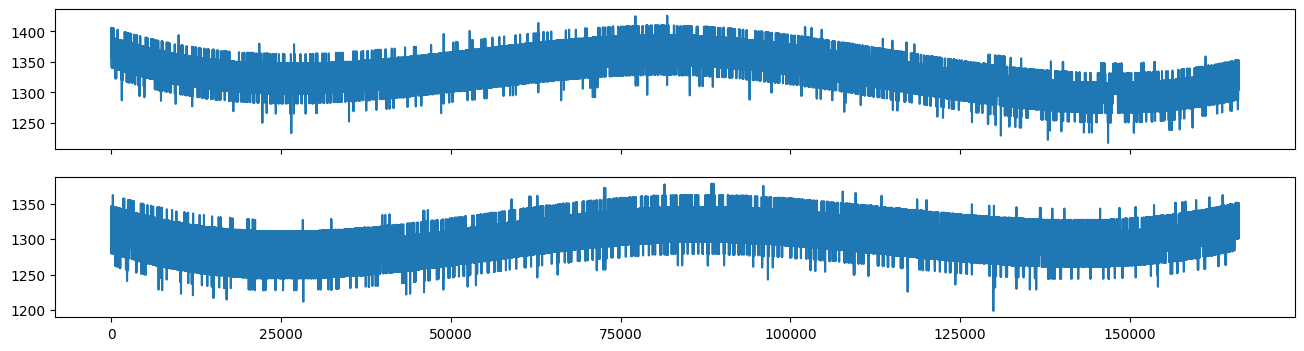

In [ ]:
plot(X_aug)

In [ ]:
X_aug.shape

(2, 166001)

In [ ]:
my_augmenter.summary()

idx	augmenter	 repeats	 prob	
  0	TimeWarp	       2	    1	
  1	Quantize	       1	    1	
  2	Drift   	       1	  0.8	
  3	Reverse 	       1	  0.5	


In [ ]:
df_aug = pd.DataFrame(X_aug)
df_aug

,0,1,2,3,4,5,6,7,8,9,...,165991,165992,165993,165994,165995,165996,165997,165998,165999,166000
0,1373,1373,1373,1373,1390,1390,1373,1373,1390,1406,...,1337,1353,1353,1337,1337,1337,1320,1320,1304,1305
1,1297,1329,1313,1346,1313,1329,1280,1346,1329,1313,...,1334,1334,1334,1334,1334,1334,1334,1334,1318,1318


In [ ]:
df_aug_y = pd.DataFrame(Y_aug)
df_aug_y

,0,1,2,3,4,5,6,7,8,9,...,165991,165992,165993,165994,165995,165996,165997,165998,165999,166000
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
df.actual_state

,actual_state
0,0
1,0
2,0
3,0
4,0
...,...
165996,2
165997,2
165998,2
165999,2


# **Advanced Time Series Data Augmentation**



![Advanced Augmentation](https://drive.google.com/uc?export=view&id=1dliFm2csshEA8kyNTnApTEAFYRhiXoAn)


**Time Series Components**

1. **Level**: The average value in the series.
2. **Trend**: The increasing or decreasing value in the series.
3. **Seasonality**: The repeating short-term cycle in the series.
4. **Noise**: The random variation in the series.


**Additive Model**:An additive model suggests that the components are added together as follows:


```
# y(t) = Level + Trend + Seasonality + Noise
```




*   An additive model is linear where changes over time are consistently made by the same amount.
*   A linear trend is a straight line.

*  A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).







**Multiplicative Model**:An additive model suggests that the components are multiplied together as follows:


```
# y(t) = Level * Trend * Seasonality * Noise
```




* A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

* A nonlinear trend is a curved line.

* A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.










**How to Choose Between Additive and Multiplicative Decompositions**

*   The additive model is useful when the seasonal variation is relatively constant over time.
*   The multiplicative model is useful when the seasonal variation increases over time.




In [ ]:
df_copy=df.copy()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_copy['trend_x1'] =seasonal_decompose(x=df['I_R02_Gripper_Load'], model='additive', period=2).trend
df_copy['seasonal_x1']=seasonal_decompose(x=df['I_R02_Gripper_Load'], model='additive', period=2).seasonal
df_copy['residual_x1']=seasonal_decompose(x=df['I_R02_Gripper_Load'], model='additive', period=2).resid

In [ ]:
df_copy

,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,...,I_MHS_GreenRocketTray,Cam1,Cam2,Description,CycleState,Cycle_Count_New,actual_state,trend_x1,seasonal_x1,residual_x1
0,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5269,...,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,NoNose,2,1,0,NaN,-0.022215,NaN
1,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5277,...,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,NoNose,2,1,0,1320.75,0.022215,0.227785
2,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,4914,...,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,NoNose,2,1,0,1331.00,-0.022215,13.022215
3,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5235,...,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,NoNose,2,1,0,1317.25,0.022215,-2.272215
4,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5311,...,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,NoNose,2,1,0,1304.75,-0.022215,-9.727785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165996,12:25:40 AM,88.130219,86.130241,87.630241,87.986328,111,111,111,111,11198,...,True,Dataset/BATCH166000/165996_0.png,Dataset/BATCH166000/165996_1.png,NoNose,8,285,2,1321.25,-0.022215,-5.227785
165997,12:25:40 AM,88.130219,86.130241,87.630241,87.975342,111,111,111,111,11189,...,True,Dataset/BATCH166000/165997_0.png,Dataset/BATCH166000/165997_1.png,NoNose,8,285,2,1323.00,0.022215,3.977785
165998,12:25:41 AM,88.130219,86.130241,87.630241,87.964355,111,111,111,111,11249,...,True,Dataset/BATCH166000/165998_0.png,Dataset/BATCH166000/165998_1.png,NoNose,8,285,2,1322.00,-0.022215,0.022215
165999,12:25:41 AM,88.130219,86.130241,87.630241,87.953369,111,111,111,111,11215,...,True,Dataset/BATCH166000/165999_0.png,Dataset/BATCH166000/165999_1.png,NoNose,8,285,2,1316.50,0.022215,0.477785


In [ ]:
# Display the transformed dataset
df_copy[["I_R02_Gripper_Load", "trend_x1", "seasonal_x1", "residual_x1"]].head()

,I_R02_Gripper_Load,trend_x1,seasonal_x1,residual_x1
0,1297,NaN,-0.022215,NaN
1,1321,1320.75,0.022215,0.227785
2,1344,1331.00,-0.022215,13.022215
3,1315,1317.25,0.022215,-2.272215
4,1295,1304.75,-0.022215,-9.727785


## Finding the period of a dataset

A **period** in time series analysis refers to the number of time steps required for a repeating pattern to complete one full cycle. It indicates the length of a seasonal or cyclic component within the data.

**Key Points:**


*   It represents the interval at which data exhibits a repeating trend.
*   A period of 10 means that every 10 time steps, the pattern repeats.
*  It is the inverse of frequency, where frequency measures how often a cycle occurs per unit of time.

**Examples:**
*  If you have hourly data and observe a cycle every 24 hours, the period is 24.
*  If your data shows a pattern repeating every 7 days (weekly cycle), the period is 7 (assuming daily data points).


**How Do You Choose period?**
*  If you know the **seasonal cycle (e.g., daily, weekly, hourly)** → Set it accordingly.
*  If unsure, use techniques like A**utoCorrelation Function (ACF) or Fourier Transforms** to detect periodicity.

<Figure size 1200x800 with 0 Axes>

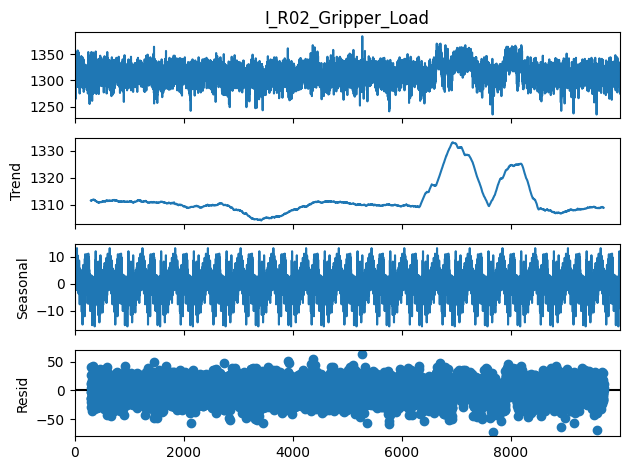

   I_R02_Gripper_Load  Trend  Seasonal  Residual
0                1297    NaN  1.299131       NaN
1                1321    NaN  7.045329       NaN
2                1344    NaN -0.644776       NaN
3                1315    NaN -2.081859       NaN
4                1295    NaN -1.895557       NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Select the first 10000 samples
df = df.head(10000)

# Convert _time column to datetime format
#df["time"] = pd.to_datetime(df["time"])


# Set the time column as index
#df.set_index("time", inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df["I_R02_Gripper_Load"], model='additive', period=600)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

# Extract components
df["Trend"] = result.trend
df["Seasonal"] = result.seasonal
df["Residual"] = result.resid

# Display the transformed dataset
print(df[["I_R02_Gripper_Load", "Trend", "Seasonal", "Residual"]].head())


In [ ]:
df

,time,Q_VFD1_Temperature,Q_VFD2_Temperature,Q_VFD3_Temperature,Q_VFD4_Temperature,M_Conv1_Speed_mmps,M_Conv2_Speed_mmps,M_Conv3_Speed_mmps,M_Conv4_Speed_mmps,I_R01_Gripper_Pot,...,I_MHS_GreenRocketTray,Cam1,Cam2,Description,CycleState,Cycle_Count_New,actual_state,Trend,Seasonal,Residual
0,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5269,...,True,Dataset/BATCH1000/000000_0.png,Dataset/BATCH1000/000000_1.png,NoNose,2,1,0,NaN,1.299131,NaN
1,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,5277,...,True,Dataset/BATCH1000/000001_0.png,Dataset/BATCH1000/000001_1.png,NoNose,2,1,0,NaN,7.045329,NaN
2,12:50:52 AM,73.130005,72.130020,73.130020,73.363525,111,83,111,111,4914,...,True,Dataset/BATCH1000/000002_0.png,Dataset/BATCH1000/000002_1.png,NoNose,2,1,0,NaN,-0.644776,NaN
3,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5235,...,True,Dataset/BATCH1000/000003_0.png,Dataset/BATCH1000/000003_1.png,NoNose,2,1,0,NaN,-2.081859,NaN
4,12:50:53 AM,73.130005,72.130020,73.130020,73.352539,111,83,111,111,5311,...,True,Dataset/BATCH1000/000004_0.png,Dataset/BATCH1000/000004_1.png,NoNose,2,1,0,NaN,-1.895557,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12:12:36 AM,87.630157,82.130234,87.130234,87.349121,111,83,111,111,11226,...,True,Dataset/BATCH10000/009995_0.png,Dataset/BATCH10000/009995_1.png,NoNose,16,16,2,NaN,-1.677119,NaN
9996,12:12:37 AM,87.630157,82.130234,87.130234,87.338135,111,83,111,111,11244,...,True,Dataset/BATCH10000/009996_0.png,Dataset/BATCH10000/009996_1.png,NoNose,16,16,2,NaN,-3.863630,NaN
9997,12:12:37 AM,87.630157,82.130234,87.130234,87.327148,111,83,111,111,11185,...,True,Dataset/BATCH10000/009997_0.png,Dataset/BATCH10000/009997_1.png,NoNose,16,16,2,NaN,1.196683,NaN
9998,12:12:38 AM,87.630157,82.130234,87.130234,87.305176,111,83,111,111,11219,...,True,Dataset/BATCH10000/009998_0.png,Dataset/BATCH10000/009998_1.png,NoNose,16,16,2,NaN,-3.928213,NaN


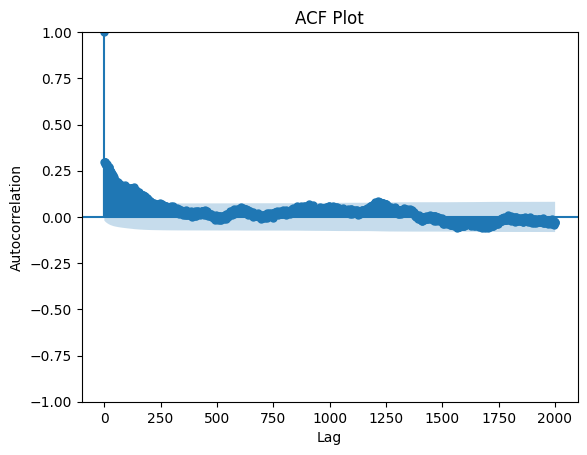

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df['I_R02_Gripper_Load'], lags=2000)
plt.title("ACF Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()


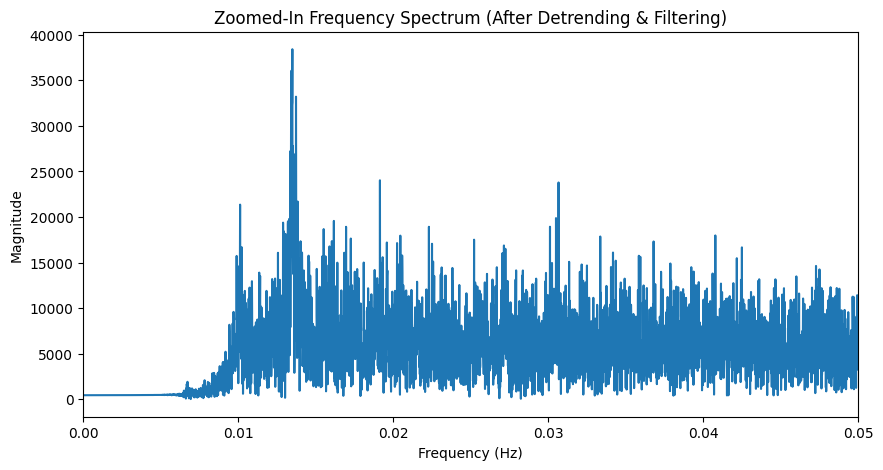

Detected Periodicity: 74.15 samples (38.03 seconds)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from statsmodels.tsa.tsatools import detrend

# Load your time series data
time_series = df['I_R02_Gripper_Load']

# Step 1: Remove the Mean (Detrending)
detrended_data = time_series - time_series.mean()

# Step 2: Apply a High-Pass Filter to Remove Low-Frequency Trends
def highpass_filter(data, cutoff=0.01, fs=1.95, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

filtered_data = highpass_filter(detrended_data)

# Step 3: Perform FFT
n = len(filtered_data)
sampling_rate = 1.95  # Hz
fft_values = np.fft.fft(filtered_data)
fft_freq = np.fft.fftfreq(n, d=1/sampling_rate)

# Step 4: Keep Only Positive Frequencies for Analysis
positive_freqs = fft_freq[:n//2]
positive_magnitudes = np.abs(fft_values[:n//2])

# Step 5: Plot Frequency Spectrum (Zoomed into Low Frequencies)
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, positive_magnitudes)
plt.xlim(0, 0.05)  # Focus on frequencies lower than 0.05 Hz (period > 20 sec)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Zoomed-In Frequency Spectrum (After Detrending & Filtering)")
plt.show()

# Step 6: Find Dominant Frequency
dominant_freq = positive_freqs[np.argmax(positive_magnitudes[1:])]  # Ignore 0 Hz
if dominant_freq > 0:
    estimated_period = 1 / dominant_freq
    print(f"Detected Periodicity: {estimated_period:.2f} samples ({estimated_period/sampling_rate:.2f} seconds)")
else:
    print("No clear periodicity detected")


**1. Interpreting the ACF Plot**
There is no strong periodic peak, which means no clear cycle is immediately evident from direct autocorrelation.
A slight increase at high lags (~600) suggests some weak cyclic behavior but not strongly defined.
This indicates that the periodicity in the data may be masked by noise or trends and is better detected using Fourier Transform.



**2. Interpreting the Fourier Transform Spectrum**
A strong peak appears at approximately 0.0135 Hz, indicating a dominant cycle in the data.
This frequency corresponds to a period of ~38 seconds, suggesting a repeating process within your assembly/disassembly operations.
Unlike the ACF plot, FFT is able to reveal this periodicity clearly, confirming that a cyclic pattern exists but is not immediately visible in ACF.
